In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
sns.set()

In [2]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [3]:
parasweep["number_of_trajectories"].min()

1

In [4]:
parasweep["Timespan"].min()

10

In [5]:
# Minimum Combination Dataset
paramin = parasweep[parasweep["Timespan"] == 10]
paramin = paramin[paramin["number_of_trajectories"] == 1]
paramin

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
108000,0.158088,2247.0,897.0,5.0,0.005,5.000000,1,10
108001,0.188695,1841.0,1514.0,5.0,0.005,6.666667,1,10
108002,0.199634,462.0,669.0,5.0,0.005,8.333333,1,10
108003,0.119647,852.0,887.0,5.0,0.005,10.000000,1,10
108004,0.176647,345.0,350.0,5.0,0.005,11.666667,1,10
...,...,...,...,...,...,...,...,...
134995,0.103933,1259.0,1096.0,100.0,0.100,84.210526,1,10
134996,0.112256,501.0,801.0,100.0,0.100,88.157895,1,10
134997,0.109886,1236.0,1053.0,100.0,0.100,92.105263,1,10
134998,0.108448,1199.0,1143.0,100.0,0.100,96.052632,1,10


In [6]:
paramin["runtime"].mean()

0.13117713783405446

In [7]:
paramin_groups = paramin.groupby(['r_birth','f_birth','f_death'])
paramin_groups.agg({"runtime":"count"}).rename(columns={"runtime":"number of groups"})

number of groups
r_birth f_birth f_death                     
5.0     0.005   5.000000                   2
                5.789474                   1
                6.578947                   1
                6.666667                   1
                7.368421                   1
...                                      ...
100.0   0.100   88.157895                  1
                91.666667                  1
                92.105263                  1
                96.052632                  1
                100.000000                 2

[26960 rows x 1 columns]

In [8]:
para_index = np.arange(len(paramin_groups))
para_index

array([    0,     1,     2, ..., 26957, 26958, 26959])

In [9]:
para_ml = pd.DataFrame(columns = ['r_birth','f_birth','f_death','runtime_normalized'], index = para_index)
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
26955,NaN,NaN,NaN,NaN
26956,NaN,NaN,NaN,NaN
26957,NaN,NaN,NaN,NaN
26958,NaN,NaN,NaN,NaN


In [10]:
# Normalization of runtime
i = 0
for k,v in paramin_groups:
    para_ml.loc[i, "r_birth"] = k[0]
    para_ml.loc[i, "f_birth"] = k[1]
    para_ml.loc[i, "f_death"] = k[2]
    group = paramin_groups.get_group(k)
    group = group.copy()
    
    if (group["runtime"] >= 20).any():
        para_ml.loc[i, "runtime_normalized"] = np.inf
    else:
        group['runtime_normalized'] = group["runtime"]/(group['Timespan'] * group['number_of_trajectories'])
        para_ml.loc[i, "runtime_normalized"] = group["runtime_normalized"].mean()
        
    i = i+1

In [11]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,5.0,0.005,5.0,0.016803
1,5.0,0.005,5.789474,0.022095
2,5.0,0.005,6.578947,0.015868
3,5.0,0.005,6.666667,0.01887
4,5.0,0.005,7.368421,0.01662
...,...,...,...,...
26955,100.0,0.1,88.157895,0.011226
26956,100.0,0.1,91.666667,0.015999
26957,100.0,0.1,92.105263,0.010989
26958,100.0,0.1,96.052632,0.010845


In [12]:
para_ml[para_ml["runtime_normalized"] == np.inf]

,r_birth,f_birth,f_death,runtime_normalized


In [13]:
# Normalization of model parameters
para_ml["r_birth_normalized"] = (para_ml["r_birth"]-para_ml["r_birth"].min())/(para_ml["r_birth"].max()-para_ml["r_birth"].min())
para_ml["f_birth_normalized"] = (para_ml["f_birth"]-para_ml["f_birth"].min())/(para_ml["f_birth"].max()-para_ml["f_birth"].min())
para_ml["f_death_normalized"] = (para_ml["f_death"]-para_ml["f_death"].min())/(para_ml["f_death"].max()-para_ml["f_death"].min())

In [14]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized
0,5.0,0.005,5.0,0.016803,0.0,0.0,0.0
1,5.0,0.005,5.789474,0.022095,0.0,0.0,0.00831
2,5.0,0.005,6.578947,0.015868,0.0,0.0,0.01662
3,5.0,0.005,6.666667,0.01887,0.0,0.0,0.017544
4,5.0,0.005,7.368421,0.01662,0.0,0.0,0.024931
...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.011226,1.0,1.0,0.875346
26956,100.0,0.1,91.666667,0.015999,1.0,1.0,0.912281
26957,100.0,0.1,92.105263,0.010989,1.0,1.0,0.916898
26958,100.0,0.1,96.052632,0.010845,1.0,1.0,0.958449


In [15]:
# Features for machine learning
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]

In [16]:
Y = Y.replace(np.inf, 99999)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [19]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [20]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [21]:
y_pred = knn.predict(X_test)

In [22]:
y_pred

array([0.01421321392059326, 0.012374939918518062, 0.010228972434997556,
       ..., 0.012589197158813473, 0.0128984785079956,
       0.011863718032836909], dtype=object)

In [23]:
for i,y in enumerate(y_pred):
    if y > 20:
        y_pred[i] = 20
    else:
        y_pred[i] = y*10*1

In [24]:
y_pred

array([0.1421321392059326, 0.12374939918518062, 0.10228972434997556, ...,
       0.12589197158813473, 0.128984785079956, 0.11863718032836909],
      dtype=object)

In [25]:
y_test = list(y_test)
for i,y in enumerate(y_test):
    if y == np.inf:
        y_test[i] = 20
    else:
        y_test[i] = y*10*1

In [27]:
from sklearn.metrics import mean_squared_error
RMSE = round(mean_squared_error(y_test, y_pred, squared=False),6) 

In [28]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test,y_pred),6)

Text(0.5, 1.0, 'MAE:0.020983, RMSE:0.029142')

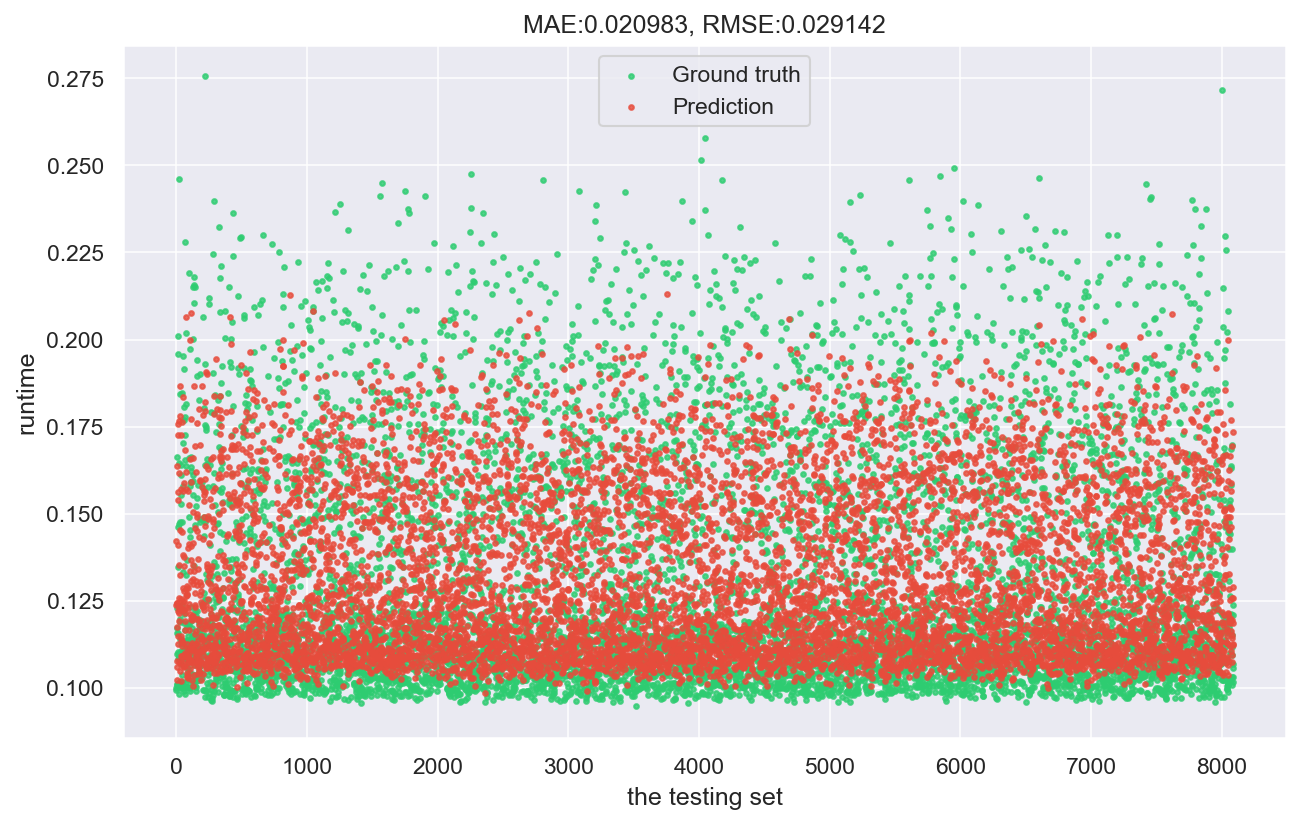

In [29]:
# Comparison between the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.scatter(np.arange(len(y_test)), y_test, s=5, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.scatter(np.arange(len(y_test)), y_pred, s=5, color='#e74c3c', alpha=0.8, label='Prediction')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('the testing set')
ax.set_title(f'MAE:{MAE}, RMSE:{RMSE}')
# The results in this script are a little different with those in the thesis report. The reason is that the script was run in two different machines - the random seeds were different, which meant that the training data were also varied. 

Text(0.5, 0, 'runtime')

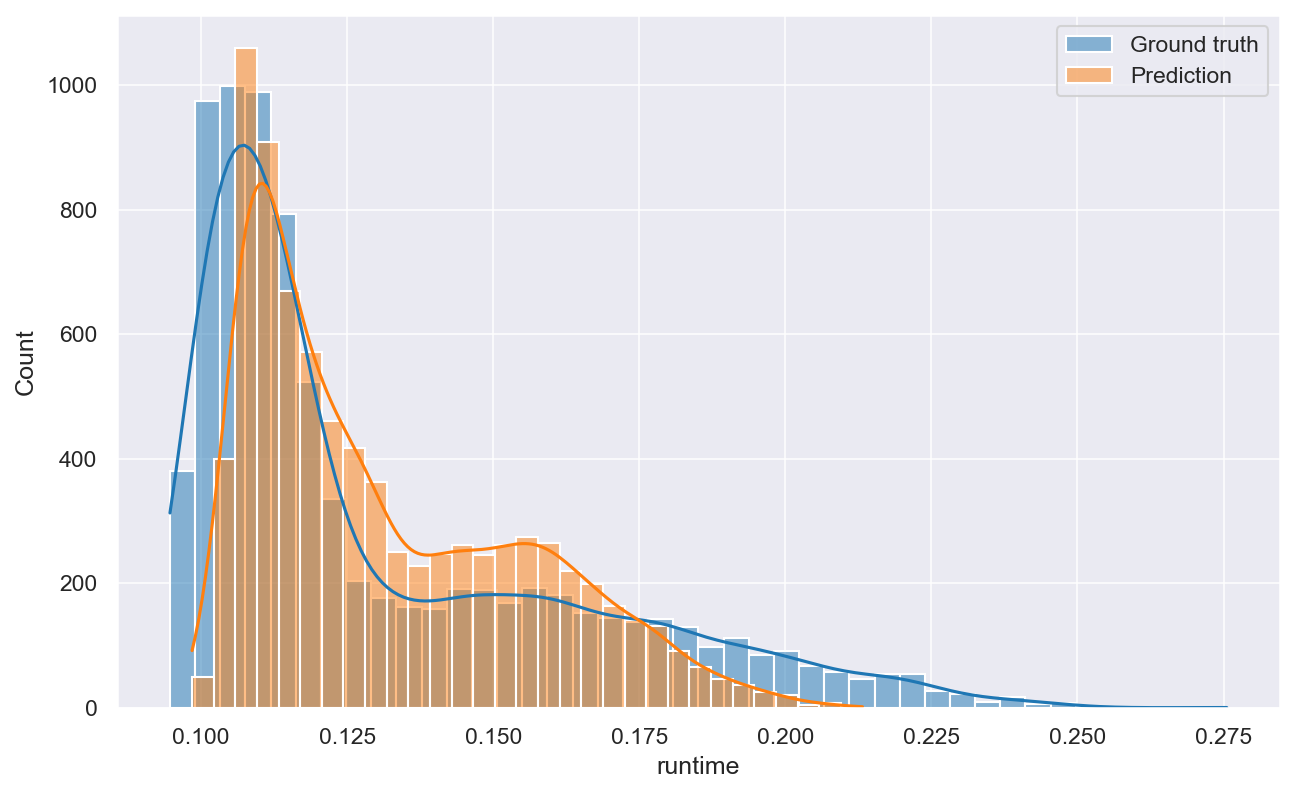

In [31]:
# The distributions of the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(x=y_test,kde=True,label='Ground truth',color = "#1f77b4")
sns.histplot(x=y_pred,kde=True,label='Prediction', color = "#ff7f0e")
ax.legend()
ax.set_xlabel('runtime')

In [32]:
# Tune the hyperparameters

In [33]:
param_grid = [
    { 
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1,31)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1,31)],
        'p': [i for i in range(1, 6)]
    }
]

In [34]:
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]
Y = Y.replace(np.inf, 99999)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

knn_new = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_new, param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             scoring='neg_mean_absolute_error')

In [35]:
grid_search.best_score_

-0.001915673937094763

In [36]:
grid_search.best_params_

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}

In [37]:
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]
Y = Y.replace(np.inf, 99999)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)
knn_reg = KNeighborsRegressor(n_neighbors = 13, p = 1, weights = 'distance')
knn_reg.fit(X_train,y_train)
y_pred_reg = knn_reg.predict(X_test)
for i,y in enumerate(y_pred_reg):
    if y > 20:
        y_pred_reg[i] = 20
    else:
        y_pred_reg[i] = y*10*1
y_test = list(y_test)
for i,y in enumerate(y_test):
    if y == np.inf:
        y_test[i] = 20
    else:
        y_test[i] = y*10*1

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
RMSE = round(mean_squared_error(y_test, y_pred_reg, squared=False),6)
MAE = round(mean_absolute_error(y_test,y_pred_reg),6)

Text(0.5, 1.0, 'MAE:0.018886, RMSE:0.026546')

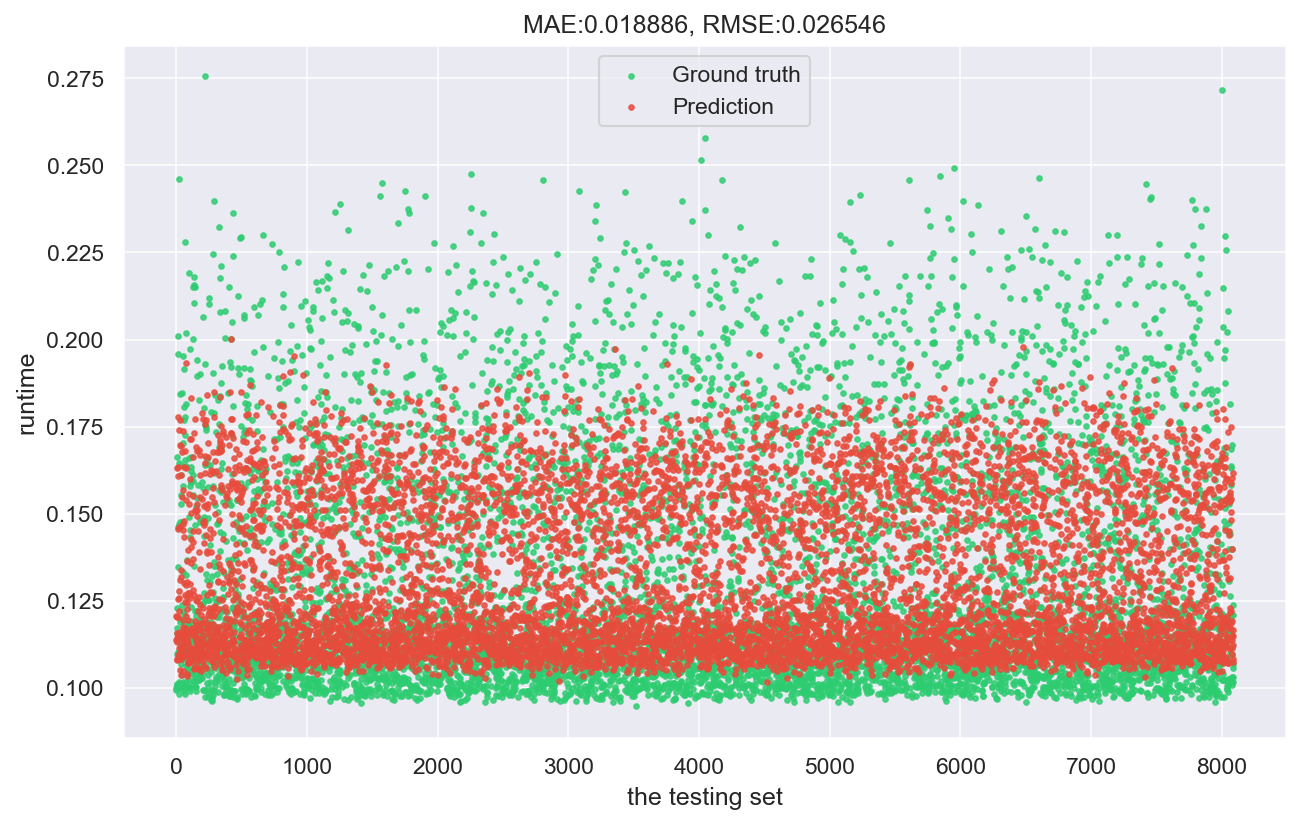

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.scatter(np.arange(len(y_test)), y_test, s=5, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.scatter(np.arange(len(y_test)), y_pred_reg, s=5, color='#e74c3c', alpha=0.8, label='Prediction')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('the testing set')
ax.set_title(f'MAE:{MAE}, RMSE:{RMSE}')

Text(0.5, 0, 'runtime')

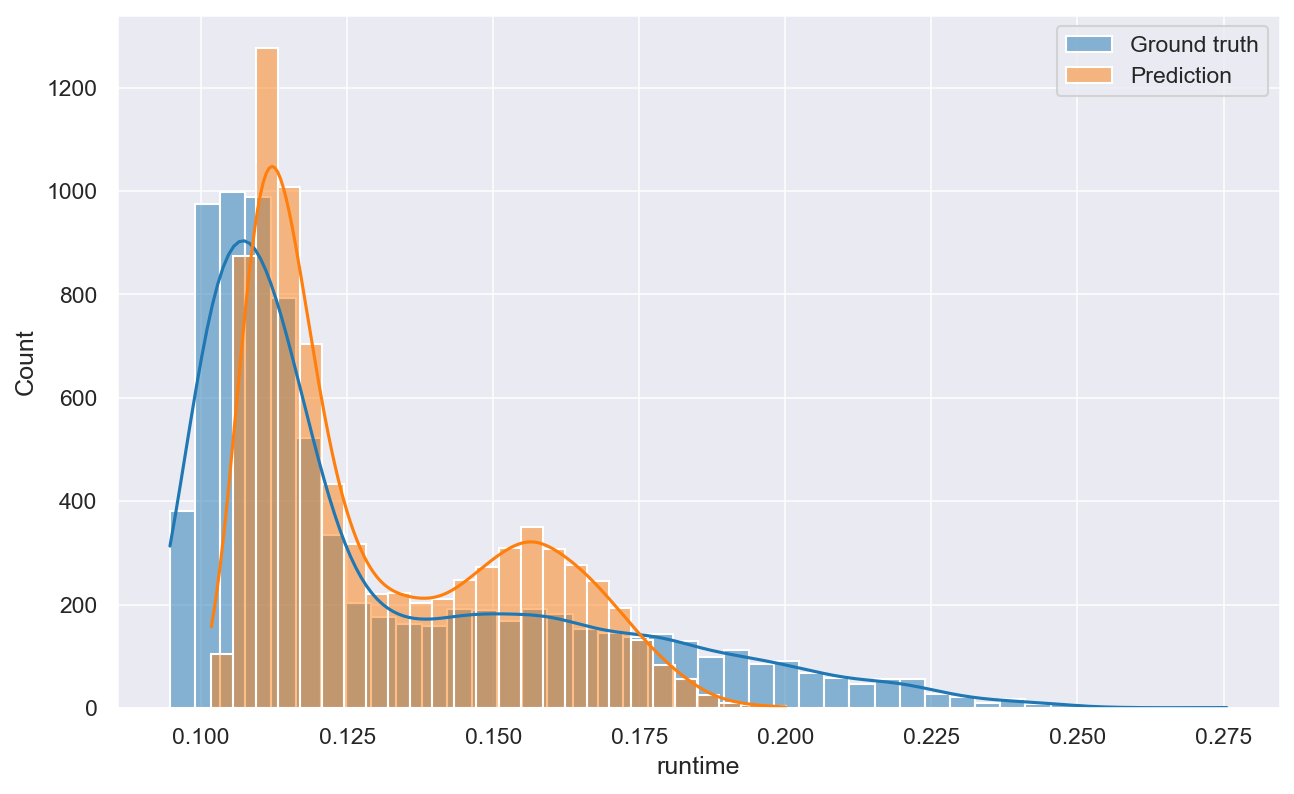

In [41]:
# The distributions of the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(x=y_test,kde=True,label='Ground truth',color = "#1f77b4")
sns.histplot(x=y_pred_reg,kde=True,label='Prediction', color = "#ff7f0e")
ax.legend()
ax.set_xlabel('runtime')

Text(0.5, 0, 'absolute error')

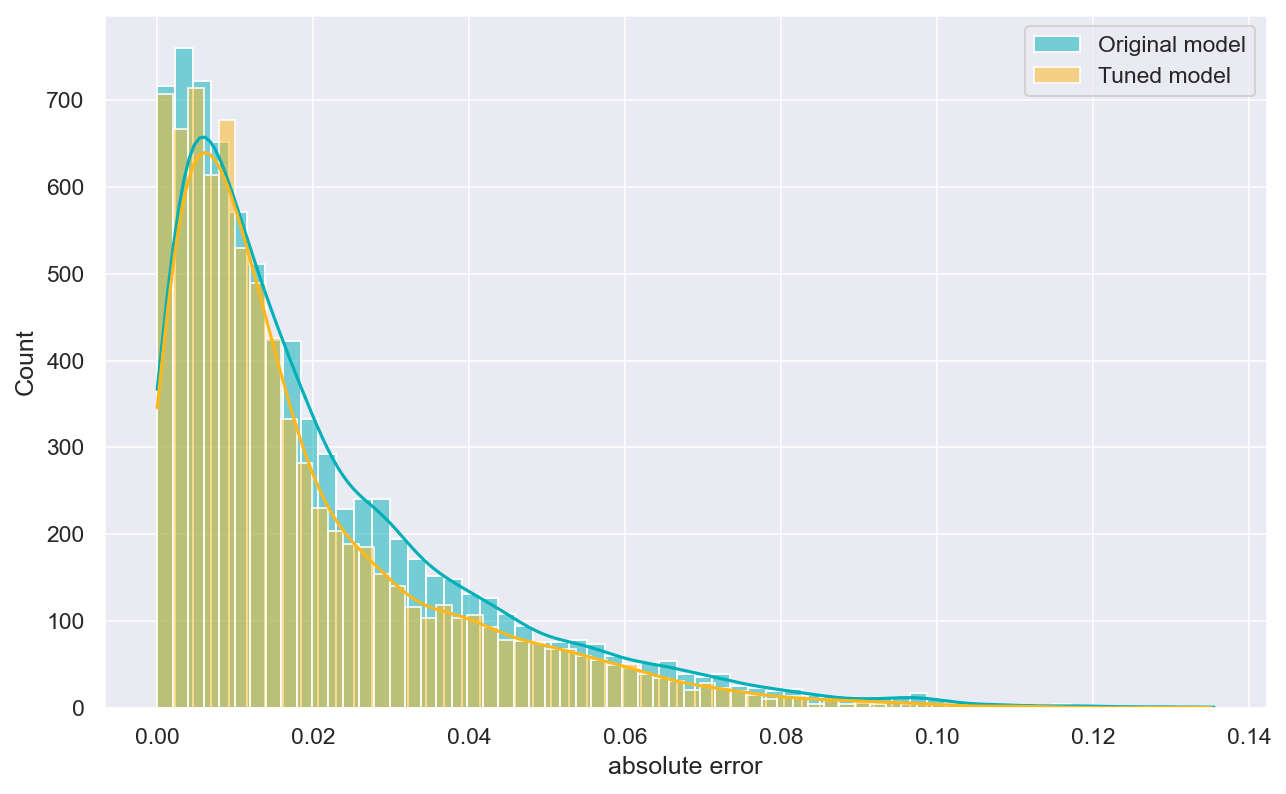

In [42]:
# Comparison of the absolute error distributions for the original and the tuned model.
abs_error = abs(y_pred-y_test)
abs_error_tuned = abs(y_pred_reg-y_test)
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(abs_error,kde=True,label='Original model',color = "#00b0b9")
sns.histplot(abs_error_tuned,kde=True,label='Tuned model',color = "#ffb81c")
ax.legend()
ax.set_xlabel('absolute error')